# 1 Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [201]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score, silhouette_samples

In [202]:
data = pd.read_csv("./csv/Titanic-Dataset.csv", sep=",")

In [203]:
data.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [204]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [205]:
data.shape

(891, 12)

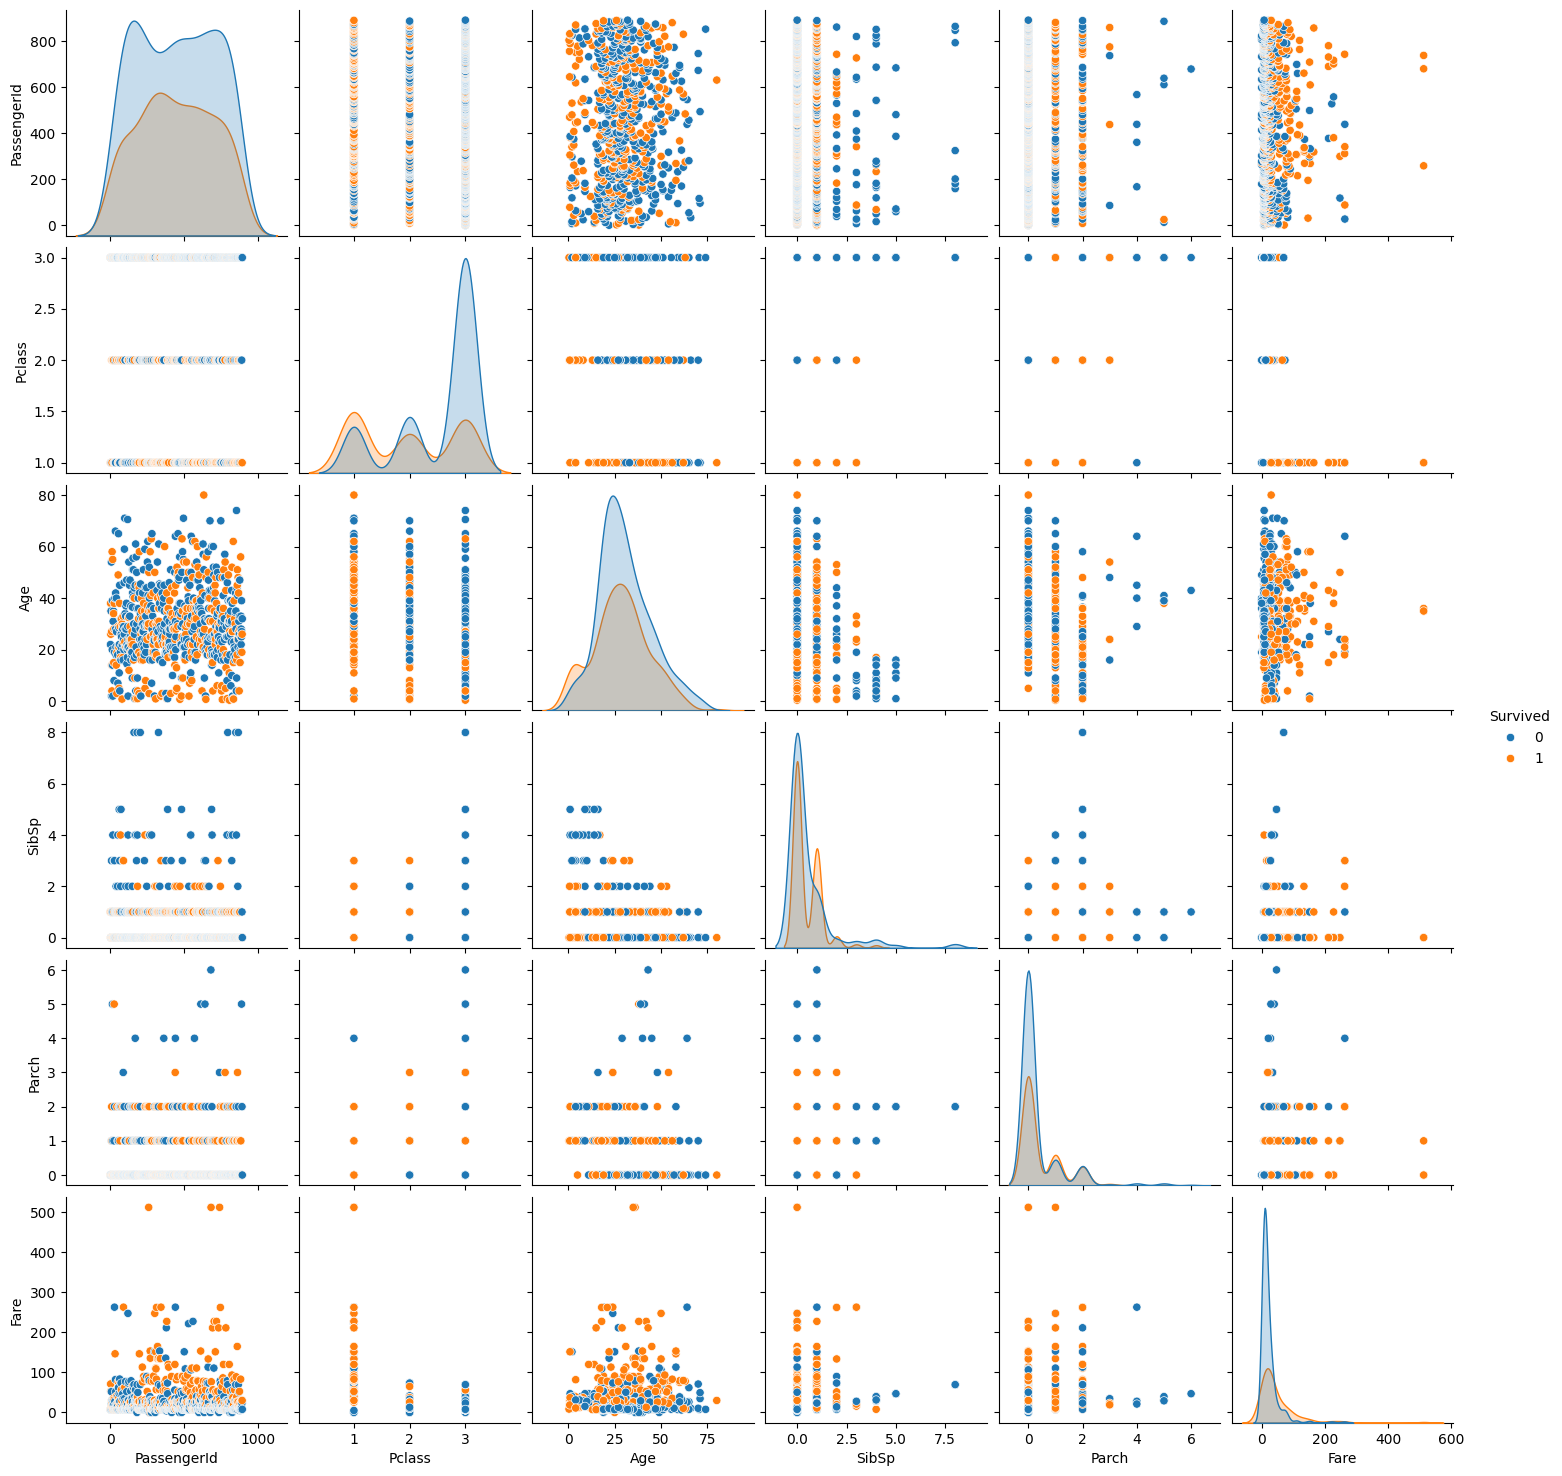

In [206]:
sns.pairplot(data, hue="Survived")

plt.show()

Imprime true si hay columnas con valores vacios o false si estan todos llenos

In [207]:
print(data.isnull().any)

<bound method DataFrame.any of      PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False 

Datos faltantes en Age y Cabin

# 2 Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [208]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Faltantes y atípicos de la variable Age

Text(0.5, 1.0, 'Identificación de Datos Faltantes en Variable Age')

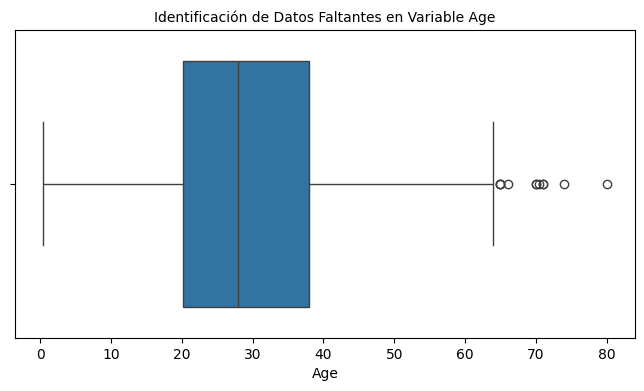

In [209]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['Age'])
plt.title('Identificación de Datos Faltantes en Variable Age', fontsize=10 )

In [210]:
print(f"Edad maxima en la variable Age: {data['Age'].max()}")

Edad maxima en la variable Age: 80.0


In [211]:
print(f"Edad minima en la variable Age: {data['Age'].min()}") # 0.42 valor atipico (0 o 1)

Edad minima en la variable Age: 0.42


In [212]:
print(f"Cantidad de valores vacios en {data['Age'].isnull().sum()}")

Cantidad de valores vacios en 177


Convertir los valores nan en la moda

In [213]:
data['Age'] = data['Age'].fillna(data['Age'].mode()[0])

Convertir la variable Age de Float a Int

In [214]:
data['Age'] = data['Age'].apply(lambda x: round(x))

In [215]:
data['Age'].dtype

dtype('int64')

In [216]:
print(f"Cantidad de valores vacios en {data['Age'].isnull().sum()}")

Cantidad de valores vacios en 0


In [217]:
print(f"Edad minima en la variable Age: {data['Age'].min()}")

Edad minima en la variable Age: 0


Faltantes y atípicos de la variable Cabin

Text(0.5, 1.0, 'Identificación de Datos Faltantes en Variable Cabin')

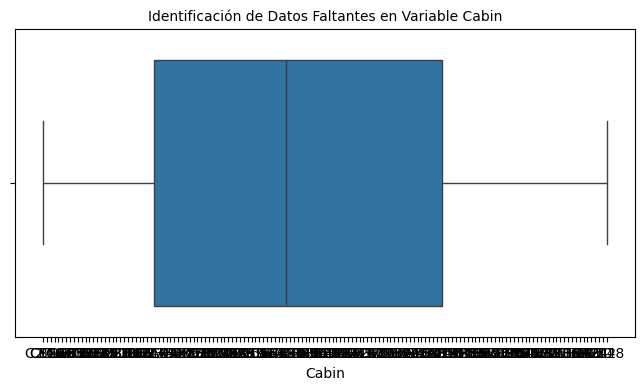

In [218]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['Cabin'])
plt.title('Identificación de Datos Faltantes en Variable Cabin', fontsize=10 )

In [219]:
print(f"Cantidad de valores vacios en Cabin: {data['Cabin'].isnull().sum()}")

Cantidad de valores vacios en Cabin: 687


In [220]:
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])

In [221]:
print(data.isnull().any)

<bound method DataFrame.any of      PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False  False  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False 

# 3  Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [222]:
data.drop(["Name", "Ticket", "Cabin", "Embarked"], axis=1, inplace=True)
data["Sex"] = data["Sex"].map({"male": 0, "female": 1})
data.fillna(data.mean(), inplace=True)

In [223]:
X = data.drop("Survived", axis=1)
y = data["Survived"]

# 4  Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5  Entrenar el modelo configurando los diferentes hiperparámetros.

In [225]:
model = LinearRegression()
model.fit(X_train.astype(float), y_train.astype(float))

LinearRegression()

# 6  Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [226]:
y_pred = model.predict(X_test)
y_pred_binary = np.round(y_pred)
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
print(f"Precisión del modelo: {accuracy*100:.2f}%")
print(f"Precisión: {precision*100:.2f}%")
print(f"Exhaustividad: {recall*100:.2f}%")
print(f"Puntuación F1: {f1*100:.2f}%")

Precisión del modelo: 77.65%
Precisión: 75.00%
Exhaustividad: 68.92%
Puntuación F1: 71.83%


# 7 Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

Resultados del modelo

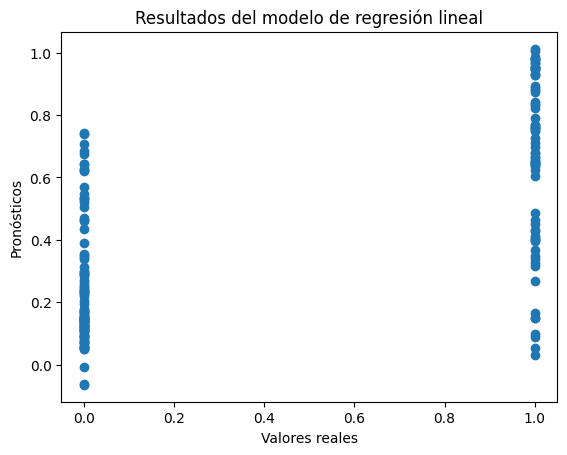

In [227]:
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales")
plt.ylabel("Pronósticos")
plt.title("Resultados del modelo de regresión lineal")
plt.show()

Gráfico de dispersión coloreado por la variable "Survived" para la relación entre sexo y supervivencia

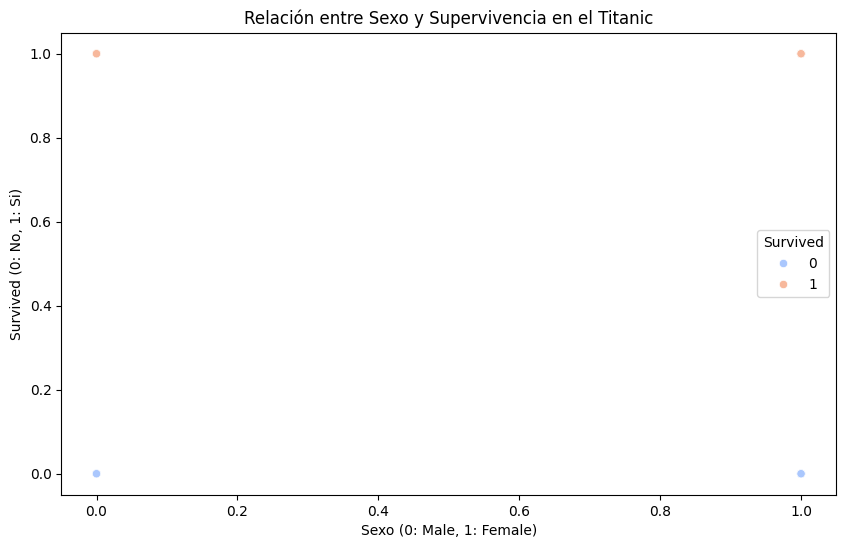

In [228]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sex', y='Survived', hue='Survived', data=data, palette='coolwarm')
plt.title('Relación entre Sexo y Supervivencia en el Titanic')
plt.xlabel('Sexo (0: Male, 1: Female)')
plt.ylabel('Survived (0: No, 1: Si)')
plt.show()

Mapa de calor para mostrar la correlación entre la clase del pasajero y la tarifa

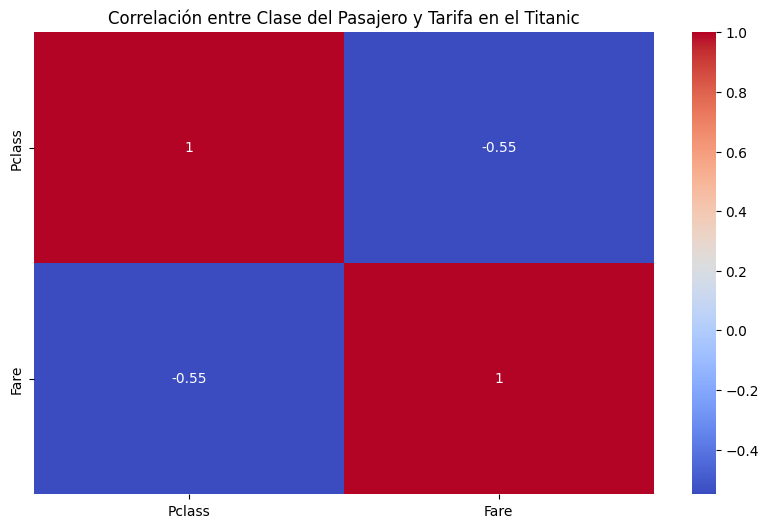

In [229]:
plt.figure(figsize=(10, 6))
correlation_matrix = data[['Pclass', 'Fare']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre Clase del Pasajero y Tarifa en el Titanic')
plt.show()

Histogramas de las variables numéricas

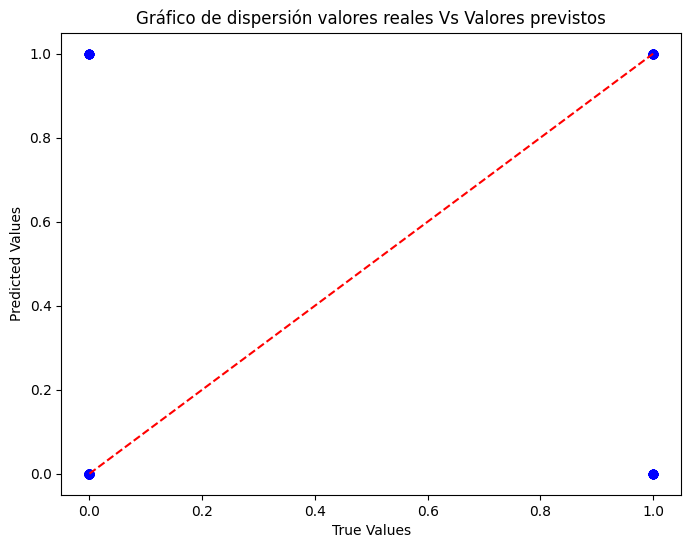

In [230]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_binary, color='blue', alpha=0.6)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea de referencia para la predicción...
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Gráfico de dispersión valores reales Vs Valores previstos')
plt.show()

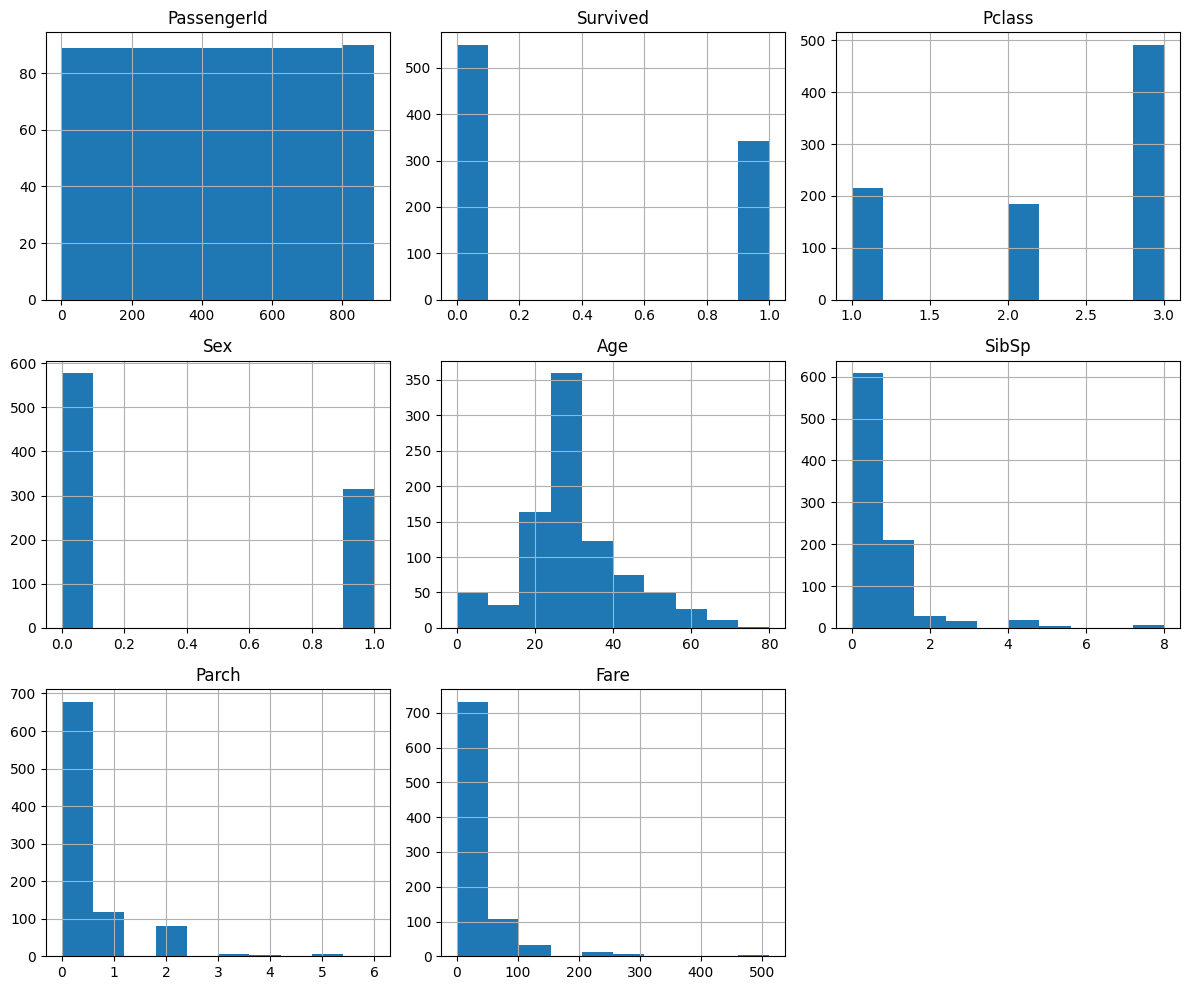

In [231]:
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

Boxplot de Fare por Survived

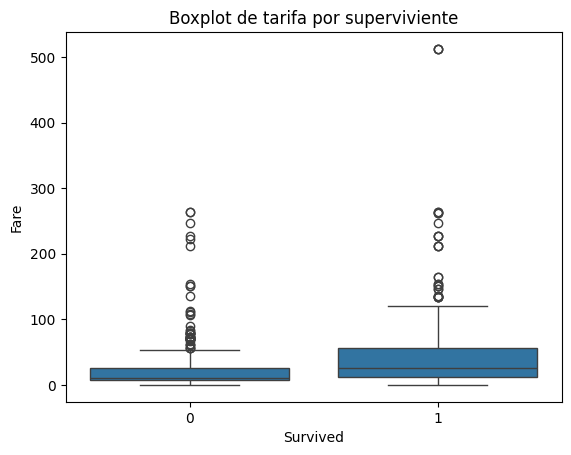

In [232]:
sns.boxplot(x='Survived', y='Fare', data=data)
plt.title('Boxplot de tarifa por superviviente')
plt.show()

Gráfico de dispersión de Age vs Fare

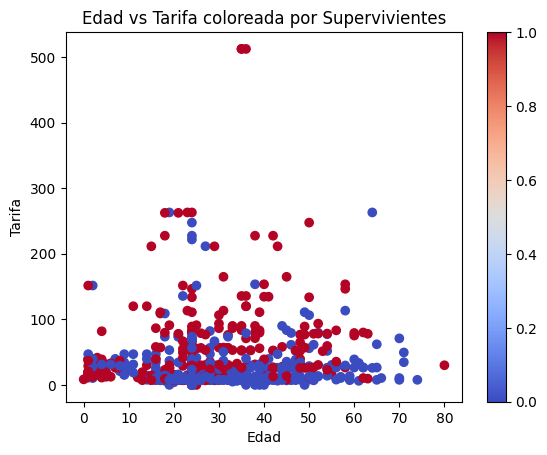

In [233]:
plt.scatter(data['Age'], data['Fare'], c=data['Survived'], cmap='coolwarm')
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.title('Edad vs Tarifa coloreada por Supervivientes')
plt.colorbar()
plt.show()

Curva de aprendizaje del modelo

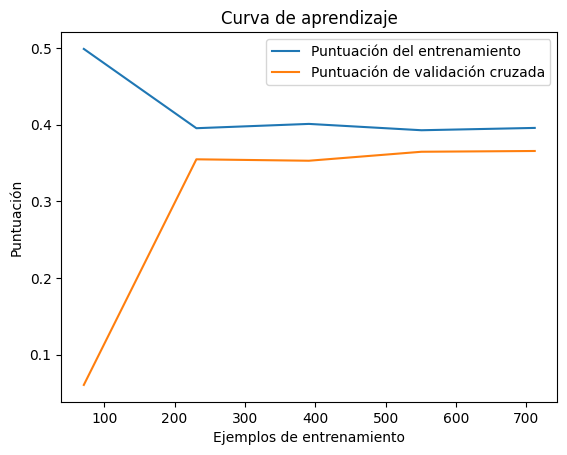

In [234]:
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Puntuación del entrenamiento')
plt.plot(train_sizes, test_scores_mean, label='Puntuación de validación cruzada')
plt.xlabel('Ejemplos de entrenamiento')
plt.ylabel('Puntuación')
plt.title('Curva de aprendizaje')
plt.legend()
plt.show()